# Data Augmentation with TensorFlow's Keras API

##  Performing data augmentation with TensorFlow's Keras API

In this episode, we'll demonstrate how to use **data augmentation** on images using TensorFlow's Keras API.

**Data augmentation** occurs when new data is created based on modifications of existing data. We'll touch on the concept of data augmentation a bit more before we jump into the code, but for a more thorough presentation of the concept, check out the data augmentation episode from the Deep Learning Fundamentals course: https://deeplizard.com/learn/video/rfM4DaLTkMs

In our case, the data we'll work with will be images. For image data specifically, data augmentation could consist of things like flipping the image horizontally or vertically, rotating the image, zooming in or out, cropping, or varying the color.

###  Why do we need data augmentation?

For starters, it will help us obtain more data for training. Maybe we have a small training set, or maybe we just want to make our training set larger. We can do that by augmenting our existing data and then adding that data to the training set.

Another reason to use data augmentation is to **reduce overfitting**. 

##  Performing data augmentation in code

Let's now see how we can perform data augmentation using Keras.

First, we import all the libraries we'll be using.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Next, we'll use this **plotImages()** function obtained from TensorFlow's documentation to plot the processed images within our Jupyter notebook. 

In [2]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

We'll now define this variable called **gen** as an **ImageDataGenerator**. All the parameters being passed are the different ways we're telling Keras to augment the image. 

In [3]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

Check out the documentation: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator to understand the units used for each augmentation technique we've specified. For example, rotation_range is measured in degrees, while width_shift_range is measured as a fraction of the width of the image.

Next, we choose a random image of a dog from disk.

In [4]:
chosen_image = random.choice(os.listdir('Dataset/dogs-vs-cats/train/dog'))
chosen_image

'dog.8188.jpg'

We then create a variable called **image_path** and set that to the relative location on disk of the chosen image.

In [5]:
image_path = 'Dataset/dogs-vs-cats/train/dog/' + chosen_image

Note, to follow along, you will need to point to a valid location and image file on your machine.

Next, we'll obtain the image by reading the image from disk by using **plt.imread()** and passing in the **image_path**. We also, expand the dimensions so that the image is compatible for how we'll use it later. 

In [8]:
image = np.expand_dims(plt.imread(image_path),0)
image

array([[[[ 94,  84,  74],
         [112, 102,  92],
         [112, 102,  92],
         ...,
         [ 61,  57,  46],
         [ 66,  62,  51],
         [ 76,  72,  61]],

        [[ 95,  85,  75],
         [104,  94,  84],
         [ 98,  88,  78],
         ...,
         [ 60,  56,  45],
         [ 70,  66,  55],
         [ 80,  76,  65]],

        [[ 82,  74,  63],
         [ 85,  77,  66],
         [ 79,  71,  60],
         ...,
         [ 61,  57,  48],
         [ 72,  68,  59],
         [ 82,  78,  69]],

        ...,

        [[  2,   0,  11],
         [  4,   2,  13],
         [  5,   5,  17],
         ...,
         [176, 153, 163],
         [174, 151, 161],
         [138, 115, 125]],

        [[  2,   0,  11],
         [  4,   2,  13],
         [  5,   5,  17],
         ...,
         [182, 159, 169],
         [176, 153, 163],
         [166, 143, 153]],

        [[  2,   0,  11],
         [  4,   2,  13],
         [  6,   6,  18],
         ...,
         [179, 156, 166],
        

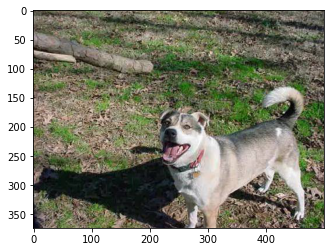

In [9]:
plt.imshow(image[0])

 Next, we'll generate batches of augmented images from the original image. 

In [10]:
aug_iter = gen.flow(image)

The **flow()** function takes numpy data and generates batches of augmented data.

Now we'll get ten samples of the augmented images. 

In [11]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

Now we'll plot the augmented images. 

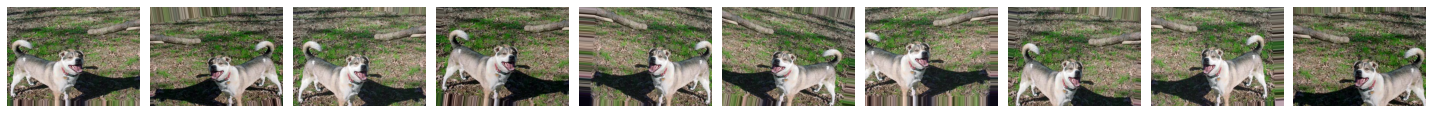

In [12]:
plotImages(aug_images)

These are ten images that have been augmented from the original image according to the parameters we passed to the ImageDataGenerator earlier.

We can see that some of the images have been flipped horizontally, some have slight color variation, some are tilted slightly to the left or right, and some are shifted down or up slightly. 

##  Save augmented data

Note, if you'd like to save these images so that you can add them to your training set, then to **gen.flow()**, you should also specify the parameter **save_to_dir** and set it equal to a valid location on disk.

You can optionally specify a prefix for which to prepend to file names of the saved augmented images, as well as optionally specify the file type as 'png' or 'jpeg' images. 'png' is the default.

**aug_iter = gen.flow(image, save_to_dir='Dataset/dogs-vs-cats/train/dog', save_prefix='aug-image-', save_format='jpeg')**

Note, you can also use **ImageDataGenerator.flow_from_directory()** as opposed to **ImageDataGenerator.flow()** if you're wanting to generate batches of augmented data from data saved to an organized directory structure on disk. See the earlier episode where we introduced this function and showed the proper directory structure.

Hopefully now you understand what data augmentation is, why you'd want to use it, and how you can make use of it in Keras. 